## sPyNNaker-Virtual Intro Lab
This Colab Notebook shows how to test that your PyNN simulation should run on sPyNNaker (although the code hasn't been tested on an actual sPyNNaker machine, so take this with a grain of salt). In theory, any code in this notebook that executes without errors should run on the sPyNNaker machines. However, none of the code executed here will actually do anything, since it isn't running on a real sPyNNaker machine. To test the functionality of your code, you should run your PyNN code with other backends (see the other notebook)

Matthew So (Apeirogons), Jan 20, 2021

In [1]:
!pip install sPyNNaker8
!pip install pynn==0.9.4
!python -m spynnaker8.setup_pynn

     |████████████████████████████████| 61kB 3.8MB/s 
     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 143kB 10.8MB/s 
     |████████████████████████████████| 174kB 11.1MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 327kB 11.7MB/s 
     |████████████████████████████████| 1.5MB 10.3MB/s 
     |████████████████████████████████| 92kB 9.3MB/s 
     |████████████████████████████████| 3.2MB 44.3MB/s 
     |████████████████████████████████| 1.5MB 48.7MB/s 
  Created wheel for sPyNNaker8: filename=sPyNNaker8-1!5.1.0-cp36-none-any.whl size=102825 sha256=75d0b4c1e5d162a97c214f24cad46f376d36ac86e7d7b70f6419ee7c49567ca0
  Stored in directory: /root/.cache/pip/wheels/e5/94/33/6a37aefc69a1342a35d3b4ce42e0609ec08f6c44ba428e92be
  Created wheel for SpiNNUtilities: filename=SpiNNUtilities-1!5.1.0-cp36-none-any.whl size=91622 sha256=22e536144716d1c1ce5aef320604c578b092dd4867b1a4bbb6027cf682fd30e1
  Stored i

     |████████████████████████████████| 419kB 8.9MB/s 
  Created wheel for pynn: filename=PyNN-0.9.4-cp36-none-any.whl size=282069 sha256=cf76db983cb676577fed11f65e4c862a8099636b5ca04a7b4e44a94b0600d6a7
  Stored in directory: /root/.cache/pip/wheels/4c/2c/01/02c4d49ba2e2a5668f5afe74878c8794038babd18f67fdb7f8
Successfully built pynn
  Found existing installation: PyNN 0.9.6
    Uninstalling PyNN-0.9.6:
      Successfully uninstalled PyNN-0.9.6
Detected PyNN version 0.9.4 and Neo version 0.6.1
Created /usr/local/lib/python3.6/dist-packages/pyNN/spiNNaker/__init__.py


In [2]:
config = """[Machine]
#-------
# Information about the target SpiNNaker board or machine:
# machineName: The name or IP address or the target board

# One and only one of the three machineName, spalloc_server or virtual_board = True must be set

# machine name is typically a URL and then version is required
machineName = None
version = None

# spalloc_server is typically a URL and then port and user are required
spalloc_server = None
spalloc_port = 22244
spalloc_user = None

# If using virtual_board both width and height must be set
virtual_board = True
# Allowed values pairs are (2,2)  (8,8)   (n*12,m*12)  and (n*12+4, m*12+4)
width = 8
height = 8

# Time scale factor allows the slowing down of the simulation
time_scale_factor = None

[Reports]
# options are DEFAULT or a file path
# In all cases oldest folders are automatically deleted to max_reports_kept=
default_report_file_path = DEFAULT

# options are DEFAULT, or a file path
# In all cases oldest folders are automatically deleted to max_reports_kept=
default_application_data_file_path = DEFAULT

[Mode]
# mode = Production or Debug
# In Debug mode all report boolean config values are automatically overwritten to True
mode = Production



# Additional config options can be found in:
# /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg
# /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg

# Copy any additional settings you want to change here including section headings

"""
with open('/root/.spynnaker.cfg', 'w') as cfg:
  cfg.write(config)

import pyNN.spiNNaker as spinnaker
spinnaker.setup()
spinnaker.end()

2021-01-21 04:25:37 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:25:37 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:25:37 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2021-01-21 04:25:37 INFO: Setting time scale factor to 10.
2021-01-21 04:25:37 INFO: Setting machine time step to 100 micro-seconds.


Detected PyNN version 0.9.4 and Neo version 0.6.1
['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


In [3]:
import pyNN.spiNNaker as sim
import matplotlib.pyplot as plt
import numpy as np
import pyNN.utility.plotting as plot

2021-01-21 04:25:37 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:25:37 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:25:37 INFO: Setting time scale factor to 1.
2021-01-21 04:25:37 INFO: Setting machine time step to 1000 micro-seconds.
2021-01-21 04:25:37 INFO: Simulating for 10 1.0ms timesteps using a hardware timestep of 1000us
2021-01-21 04:25:37 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2021-01-21 04:25:37 INFO: Starting execution process


['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


2021-01-21 04:25:37 INFO: Time 0:00:00.004952 taken by VirtualMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2021-01-21 04:25:37 INFO: Time 0:00:00.044848 taken by PreAllocateResourcesForExtraMonitorSupport
2021-01-21 04:25:37 INFO: Time 0:00:00.000747 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:25:37 INFO: Time 0:00:00.028877 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:25:37 INFO: Time 0:00:00.005810 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:25:37 INFO: Time 0:00:00.040918 taken by MallocBasedChipIDAllocator
Inserting ext

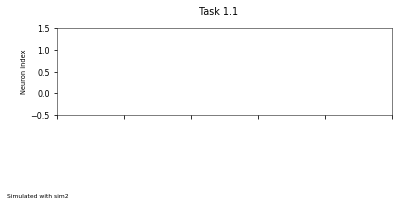

In [4]:
# Task 1.1: A simple neural network [Easy]
sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0]), label='inp_0')
inp_source_1 = sim.Population(1, sim.SpikeSourceArray(spike_times=[1000]), label='inp_1')
LIF_neurons = sim.Population(2, sim.IF_curr_exp(), label='LIF')
connection_0 = sim.Projection(inp_source_0, LIF_neurons, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=5, delay=2))

LIF_neurons.record(['spikes'])
simtime = 10
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains
sim.end()

plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 1.1",
    annotations="Simulated with {}".format('sim2')
    )
plt.show()



2021-01-21 04:25:39 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:25:39 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:25:39 INFO: Setting time scale factor to 1.
2021-01-21 04:25:39 INFO: Setting machine time step to 1000 micro-seconds.
2021-01-21 04:25:39 INFO: Simulating for 10 1.0ms timesteps using a hardware timestep of 1000us
2021-01-21 04:25:39 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2021-01-21 04:25:39 INFO: Starting execution process


['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


2021-01-21 04:25:40 INFO: Time 0:00:00.003451 taken by VirtualMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2021-01-21 04:25:40 INFO: Time 0:00:00.056952 taken by PreAllocateResourcesForExtraMonitorSupport
2021-01-21 04:25:40 INFO: Time 0:00:00.000537 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:25:40 INFO: Time 0:00:00.043608 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:25:40 INFO: Time 0:00:00.007447 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:25:40 INFO: Time 0:00:00.052055 taken by MallocBasedChipIDAllocator
Inserting ext

[] mV


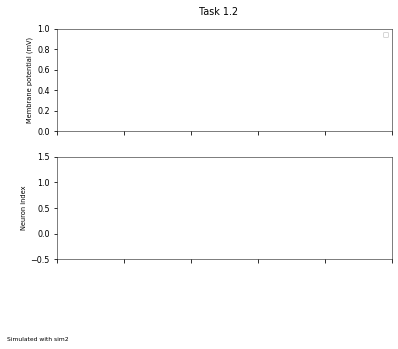

In [5]:
# Task 1.2: Changing parameters [Easy]
sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0]), label='inp_0')
inp_source_1 = sim.Population(1, sim.SpikeSourceArray(spike_times=[1000]), label='inp_1')
LIF_neurons = sim.Population(2, sim.IF_curr_exp(tau_syn_E=1.0), label='LIF')
connection_0 = sim.Projection(inp_source_0, LIF_neurons, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=5, delay=2))

LIF_neurons.record(['spikes', 'v'])
simtime = 10
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
print(v)
sim.end()


plot.Figure(
# plot voltage for first ([0]) neuron
plot.Panel(v, ylabel="Membrane potential (mV)",
data_labels=[LIF_neurons.label], yticks=True, xlim=(0, simtime)),
# plot spikes (or in this case spike)
plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
title="Task 1.2",
annotations="Simulated with {}".format('sim2')
)
plt.show()



2021-01-21 04:25:43 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:25:43 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:25:43 INFO: Setting time scale factor to 1.
2021-01-21 04:25:43 INFO: Setting machine time step to 1000 micro-seconds.
2021-01-21 04:25:43 INFO: Simulating for 2000 1.0ms timesteps using a hardware timestep of 1000us
2021-01-21 04:25:43 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2021-01-21 04:25:43 INFO: Starting execution process
2021-01-21 04:25:43 INFO: Time 0:00:00.002835 taken by VirtualMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          5

['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:25:43 INFO: Time 0:00:00.031849 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:25:43 INFO: Time 0:00:00.004540 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:25:43 INFO: Time 0:00:00.032462 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2021-01-21 04:25:43 INFO: Time 0:00:00.045062 taken by InsertExtraMonitorVerticesToGraphs
Filtering edges
|0%                          50%                         100%|
 =========================================================/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/models/neural_projections/connectors/from_list_connector.py:129: VisibleDeprecationWarning: Creating an n

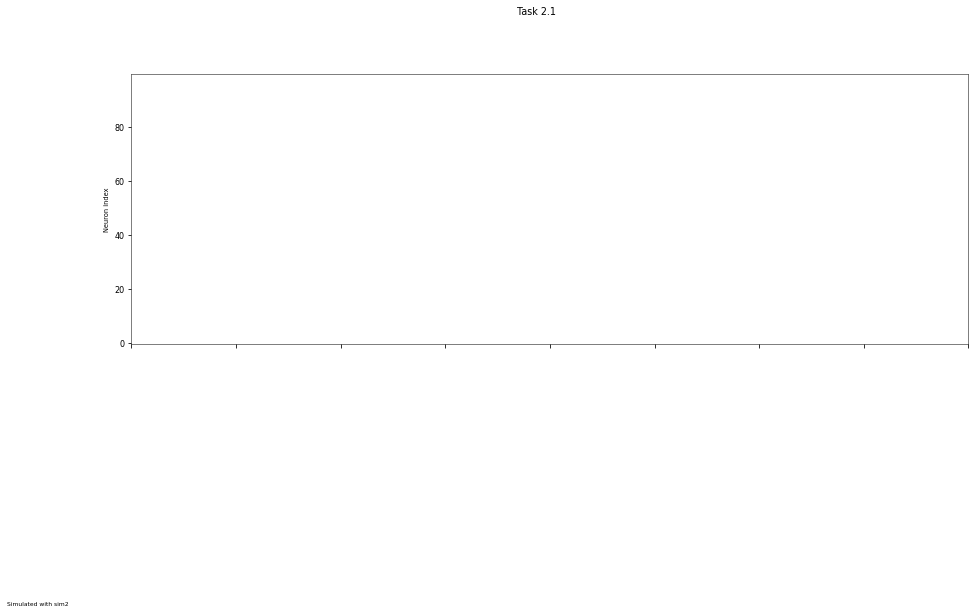

In [6]:
# Task 2.1: Synfire Chain [Moderate]
sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0.0]))
LIF_neurons = sim.Population(100, sim.IF_curr_exp(), label='LIF')

inp_first_connector = sim.FromListConnector([(0, 0)])
connection_0 = sim.Projection(inp_source_0, LIF_neurons, inp_first_connector,synapse_type=sim.StaticSynapse(weight=5, delay=1)) 

between_connector = sim.FromListConnector([(i, i+1) for i in range(len(LIF_neurons)-1)])
connection_between = sim.Projection(LIF_neurons, LIF_neurons, between_connector, synapse_type=sim.StaticSynapse(weight=5, delay=5))

recurrent_connector = sim.FromListConnector([(99, 0)])

connection_recurrent = sim.Projection(LIF_neurons, LIF_neurons, recurrent_connector, synapse_type=sim.StaticSynapse(weight=5, delay=5))

LIF_neurons.record(['spikes', 'v'])
simtime = 2000
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 2.1",
    annotations="Simulated with {}".format('sim2')
    )
plt.show()



### This code caused an error when running it with SpyNNaker virtual environment, but not pyNN backends. 
I hypothesize that this might be a bug in the SpyNNaker virtual environment library, further testing is required. However, this only seems to happen with RandomDistribution('uniform') 

In [8]:
# Task 2.2: Random Values
sim.setup(timestep=1.0)
simtime = 5000

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0.0]))
LIF_neurons = sim.Population(100, sim.IF_curr_exp(), label='LIF')

inp_first_connector = sim.FromListConnector([(0, 0)])
connection_0 = sim.Projection(inp_source_0, LIF_neurons, inp_first_connector,synapse_type=sim.StaticSynapse(weight=5, delay=1)) 

between_connector = sim.FromListConnector([(i, i+1) for i in range(len(LIF_neurons)-1)])
connection_between = sim.Projection(LIF_neurons, LIF_neurons, between_connector, synapse_type=sim.StaticSynapse(weight=5, delay=sim.RandomDistribution('uniform', low=1.0, high=15.0)))

recurrent_connector = sim.FromListConnector([(99, 0)])

connection_recurrent = sim.Projection(LIF_neurons, LIF_neurons, recurrent_connector, synapse_type=sim.StaticSynapse(weight=5, delay=sim.RandomDistribution('uniform', low=1.0, high=15.0)))

LIF_neurons.record(['spikes', 'v'])

sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 2.2",
    annotations="Simulated with {}".format('sim2')
    )
plt.show()



2021-01-21 04:27:37 INFO: Resetting
2021-01-21 04:27:37 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:27:37 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:27:37 INFO: Setting time scale factor to 1.
2021-01-21 04:27:37 INFO: Setting machine time step to 1000 micro-seconds.


['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


TypeError: ignored

2021-01-21 04:31:40 INFO: Resetting
2021-01-21 04:31:40 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:31:40 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:31:40 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2021-01-21 04:31:40 INFO: Setting time scale factor to 10.
2021-01-21 04:31:40 INFO: Setting machine time step to 100 micro-seconds.
2021-01-21 04:31:40 INFO: Simulating for 10000 0.1ms timesteps using a hardware timestep of 10us
2021-01-21 04:31:40 INFO: [Reports]write_b

['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.047210 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.006254 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.035362 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.037222 taken by InsertExtraMonitorVerticesToGraphs
Filtering edges
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.041654 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2021-01-21 04:31:41 INFO: Time 0:00:00.044952 taken by OneTo

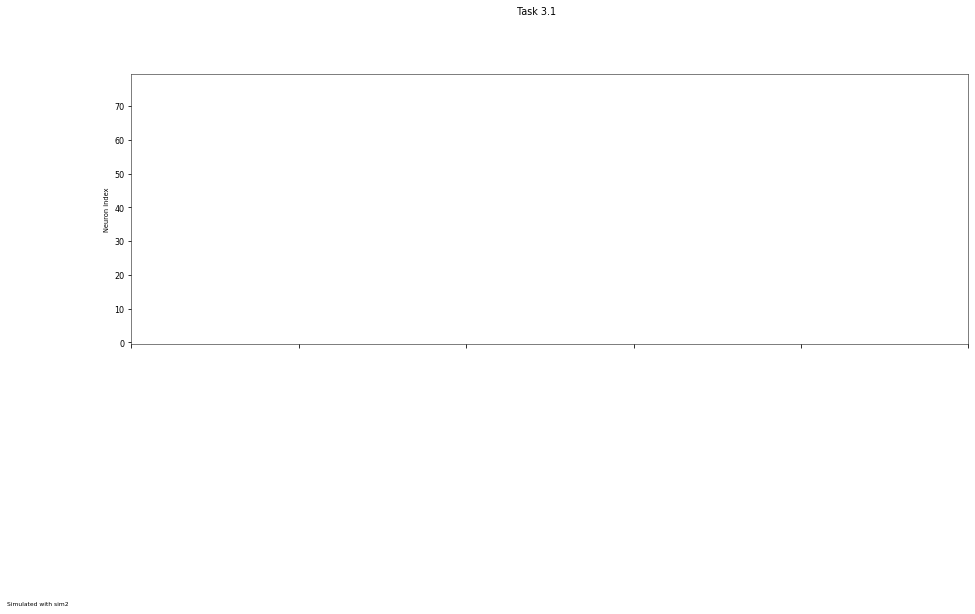

In [9]:
# Task 3.1: Balanced Random Cortex-like Network
ts = 0.1
sim.setup(timestep=ts)

exc = sim.Population(80, sim.IF_curr_exp(), label='exc')
inh = sim.Population(20, sim.IF_curr_exp(), label='inh')


exc_stim = sim.Population(80, sim.SpikeSourcePoisson(rate=1000))
inh_stim = sim.Population(20, sim.SpikeSourcePoisson(rate=1000))

excstim_exc = sim.Projection(exc_stim, exc, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))
inhstim_inh = sim.Projection(inh_stim, inh, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))

exc_inh = sim.Projection(exc, inh, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=0.1, sigma=0.1, low=0, high=np.inf), delay = sim.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

exc_exc = sim.Projection(exc, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=0.1, sigma=0.1, low=0, high=np.inf), delay = sim.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

inh_exc = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=-0.4, sigma=0.1, low=-np.inf, high=0), delay = sim.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

inh_inh = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=-0.4, sigma=0.1, low=-np.inf, high=0), delay = sim.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

exc.initialize(v=sim.RandomDistribution('uniform', low=-65, high=-55))
inh.initialize(v=sim.RandomDistribution('uniform', low=-65, high=-55))

exc.record(['spikes'])
simtime=1000
sim.run(simtime)
neo = exc.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.1",
    annotations="Simulated with {}".format('sim2')
    )
plt.show()


2021-01-21 04:31:44 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:31:44 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:31:44 WARNING: A timestep was entered that has forced sPyNNaker to automatically slow the simulation down from real time by a factor of 10. To remove this automatic behaviour, please enter a timescaleFactor value in your .spynnaker.cfg
2021-01-21 04:31:44 INFO: Setting time scale factor to 10.
2021-01-21 04:31:44 INFO: Setting machine time step to 100 micro-seconds.
2021-01-21 04:31:44 INFO: Simulating for 10000 0.1ms timesteps using a hardware timestep of 10us
2021-01-21 04:31:44 INFO: [Reports]write_board_chip_report has been set to Fal

['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']



2021-01-21 04:31:44 INFO: Time 0:00:00.044040 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:31:44 INFO: Time 0:00:00.006649 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:31:44 INFO: Time 0:00:00.036582 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2021-01-21 04:31:44 INFO: Time 0:00:00.040782 taken by InsertExtraMonitorVerticesToGraphs
Filtering edges
|0%                          50%                         100%|
2021-01-21 04:31:44 INFO: Time 0:00:00.061721 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2021-01-21 04:31:44 INFO: Time 0:00:00.053242 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%

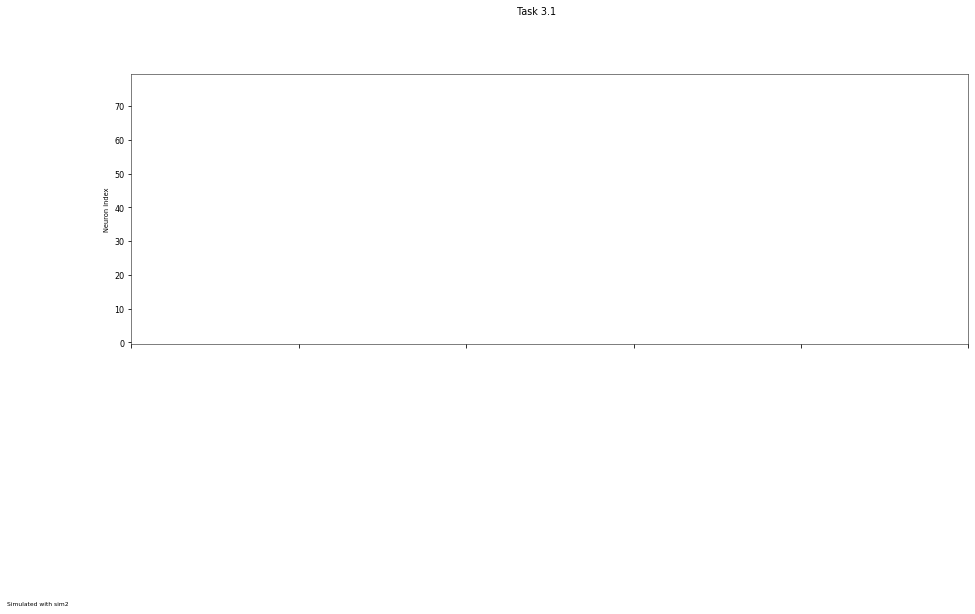

In [10]:
# Task 3.1: Balanced Random Cortex-like Network
ts = 0.1
sim.setup(timestep=ts)

exc = sim.Population(80, sim.IF_curr_exp(), label='exc')
inh = sim.Population(20, sim.IF_curr_exp(), label='inh')


exc_stim = sim.Population(80, sim.SpikeSourcePoisson(rate=1000))
inh_stim = sim.Population(20, sim.SpikeSourcePoisson(rate=1000))

excstim_exc = sim.Projection(exc_stim, exc, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))
inhstim_inh = sim.Projection(inh_stim, inh, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))

exc_inh = sim.Projection(exc, inh, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=0.11, sigma=0.1, low=0, high=np.inf), delay = sim.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

exc_exc = sim.Projection(exc, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=0.11, sigma=0.1, low=0, high=np.inf), delay = sim.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

inh_exc = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=-0.44, sigma=0.1, low=-np.inf, high=0), delay = sim.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

inh_inh = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=sim.RandomDistribution('normal_clipped', mu=-0.44, sigma=0.1, low=-np.inf, high=0), delay = sim.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

exc.initialize(v=sim.RandomDistribution('uniform', low=-65, high=-55))
inh.initialize(v=sim.RandomDistribution('uniform', low=-65, high=-55))

exc.record(['spikes'])
simtime=1000
sim.run(simtime)
neo = exc.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.1",
    annotations="Simulated with {}".format('sim2')
    )
plt.show()


2021-01-21 04:31:47 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:31:47 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:31:48 INFO: Setting time scale factor to 1.
2021-01-21 04:31:48 INFO: Setting machine time step to 1000 micro-seconds.
2021-01-21 04:31:48 INFO: Simulating for 3000 1.0ms timesteps using a hardware timestep of 1000us
2021-01-21 04:31:48 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2021-01-21 04:31:48 INFO: Starting execution process
2021-01-21 04:31:48 INFO: Time 0:00:00.002638 taken by VirtualMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          5

['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


2021-01-21 04:31:48 INFO: Time 0:00:00.000672 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:31:48 INFO: Time 0:00:00.032562 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:31:48 INFO: Time 0:00:00.005780 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:31:48 INFO: Time 0:00:00.044885 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2021-01-21 04:31:48 INFO: Time 0:00:00.048297 taken by InsertExtraMonitorVerticesToGraphs
Filtering edges
|0%                          50%                         100%|
 ===========================================

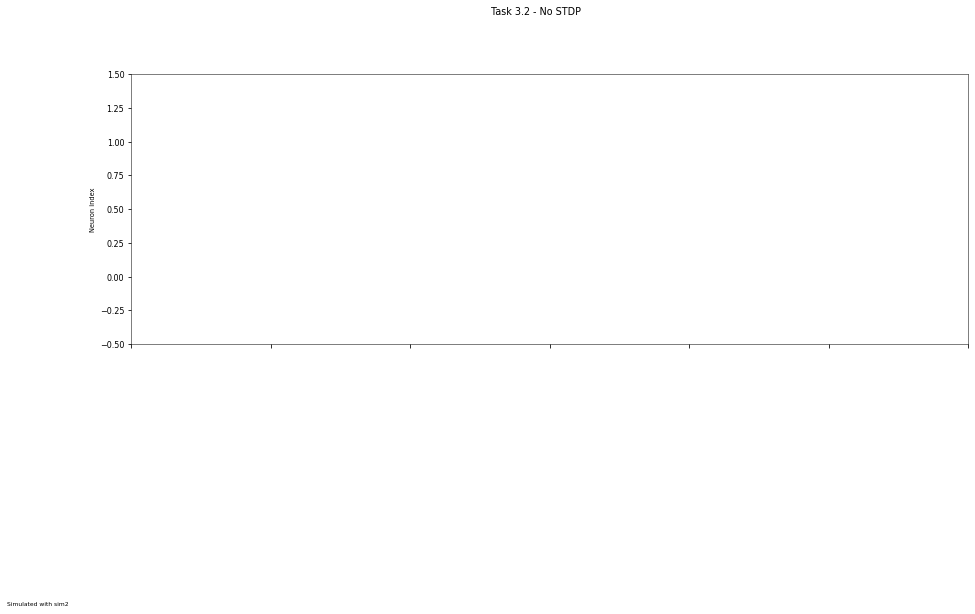

2021-01-21 04:31:50 INFO: Read cfg files: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg, /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg, /root/.spynnaker.cfg
2021-01-21 04:31:50 INFO: Will search these locations for binaries: /usr/local/lib/python3.6/dist-packages/spinn_front_end_common/common_model_binaries : /usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/model_binaries
2021-01-21 04:31:50 INFO: Setting time scale factor to 1.
2021-01-21 04:31:50 INFO: Setting machine time step to 1000 micro-seconds.
2021-01-21 04:31:50 INFO: Simulating for 3000 1.0ms timesteps using a hardware timestep of 1000us
2021-01-21 04:31:50 INFO: [Reports]write_board_chip_report has been set to False as using virtual boards
2021-01-21 04:31:50 INFO: Starting execution process
2021-01-21 04:31:50 INFO: Time 0:00:00.003831 taken by VirtualMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          5

[[       nan 0.10009766]
 [       nan        nan]]
['/usr/local/lib/python3.6/dist-packages/spinn_front_end_common/interface/spinnaker.cfg', '/usr/local/lib/python3.6/dist-packages/spynnaker/pyNN/spynnaker.cfg', '/root/.spynnaker.cfg']


2021-01-21 04:31:50 INFO: Time 0:00:00.000530 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2021-01-21 04:31:50 INFO: Time 0:00:00.033151 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2021-01-21 04:31:50 INFO: Time 0:00:00.006559 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2021-01-21 04:31:50 INFO: Time 0:00:00.045892 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2021-01-21 04:31:50 INFO: Time 0:00:00.046598 taken by InsertExtraMonitorVerticesToGraphs
Filtering edges
|0%                          50%                         100%|
 ===========================================

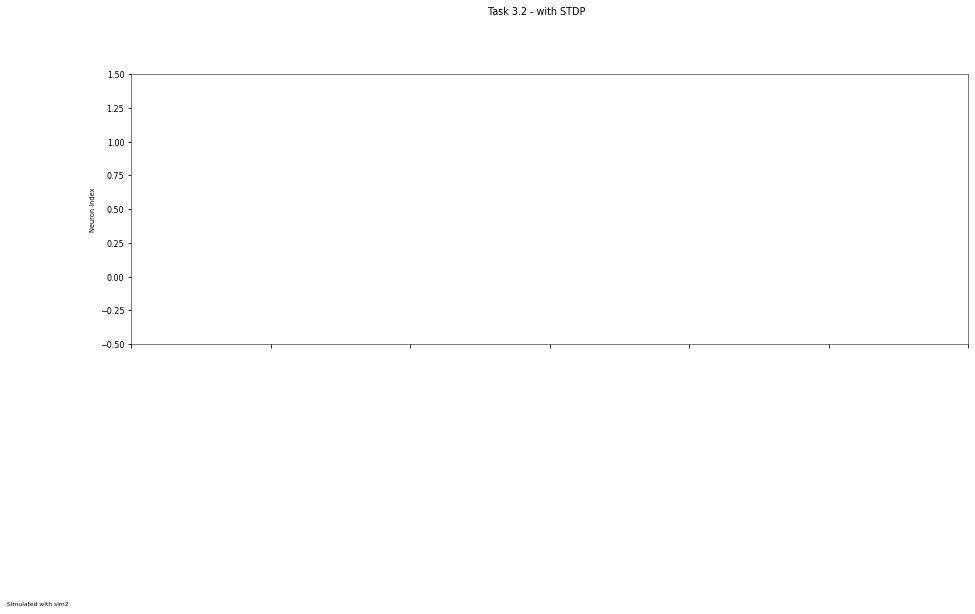

[[       nan 0.10009766]
 [       nan        nan]]


In [11]:
sim.setup(timestep=1)
pop_0 = sim.Population(2, sim.IF_curr_exp())
timing_rule = sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0,
A_plus=0.5, A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0, w_min=0.0)

stdp = sim.STDPMechanism(timing_dependence = timing_rule, weight_dependence = weight_rule, weight=0.1, delay=3)

between_connection = sim.Projection(pop_0, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=stdp)

stim_0 = sim.Population(1, sim.SpikeSourceArray(spike_times = [] + [2600, 2700, 2800, 2900]))
stim_1 = sim.Population(1, sim.SpikeSourceArray(spike_times = []))
stim_conn_0 = sim.Projection(stim_0, pop_0, sim.FromListConnector([(0, 0)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
stim_conn_1 = sim.Projection(stim_1, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
pop_0.record(['spikes'])

simtime=3000
sim.run(simtime)
neo = pop_0.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.2 - No STDP",
    annotations="Simulated with {}".format('sim2'))
plt.show()
#plt.figure(figsize=(15, 10))
#plot.Figure(
#    plot.Panel(spikes_1, yticks=True, markersize=5, xlim=(0, simtime)),
#    title="Task 3.2",
#    annotations="Simulated with {}".format('sim2'))
#plt.show()
print(between_connection.get('weight', format='array'))
sim.end()



sim.setup(timestep=1)
pop_0 = sim.Population(2, sim.IF_curr_exp())
timing_rule = sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0,
A_plus=0.5, A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0, w_min=0.0)

stdp = sim.STDPMechanism(timing_dependence = timing_rule, weight_dependence = weight_rule, weight=0.1, delay=3)

between_connection = sim.Projection(pop_0, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=stdp)

stim_0 = sim.Population(1, sim.SpikeSourceArray(spike_times = [25*x for x in range(100)] + [2600, 2700, 2800, 2900]))
stim_1 = sim.Population(1, sim.SpikeSourceArray(spike_times = [25*x+2 for x in range(100)]))
stim_conn_0 = sim.Projection(stim_0, pop_0, sim.FromListConnector([(0, 0)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
stim_conn_1 = sim.Projection(stim_1, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
pop_0.record(['spikes'])

simtime=3000
sim.run(simtime)
neo = pop_0.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.2 - with STDP",
    annotations="Simulated with {}".format('sim2'))
plt.show()
#plt.figure(figsize=(15, 10))
#plot.Figure(
#    plot.Panel(spikes_1, yticks=True, markersize=5, xlim=(0, simtime)),
#    title="Task 3.2",
#    annotations="Simulated with {}".format('sim2'))
#plt.show()
print(between_connection.get('weight', format='array'))
sim.end()


